# Статистика, DS-поток
## Практическое задание 9


**Правила:**

* Дедлайн **9 ноября 16:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`.
* Прислать нужно ноутбук в формате `ipynb`, а также файл `utils.py` с вашим кодом.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 &mdash; 6 баллов;
* Задача 2 &mdash; 3 балла;
* Задача 3 &mdash; 2 балла;
* Задача 4 &mdash; 20 баллов.

**Важность задач:**

* *высокая:* задачи 1-3;
* *средняя:* задача 4.

In [173]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.graph_objects as go
import plotly.express as px

from IPython.display import display

# from statsmodels.sandbox.stats.multicomp import multipletests
from statsmodels.stats.multitest import multipletests

sns.set(font_scale=1.3, style='whitegrid', palette='Set2')

%matplotlib inline

_____
## Задача 1.

Вспомним задачу из предыдущего практического задания. Напомним формулировку.

Пусть $X_1, ..., X_n \sim Bern(p)$ &mdash; проведенные наблюдения, где $X_i = 1$, если в $i$-м испытании случилась неудача после того, как черный кот перебежал дорогу, а $p$ &mdash; неизвестная вероятность такого события. 
Вы хотите проверить гипотезу $\mathsf{H}_0\colon p=1/2$ против альтернативы $\mathsf{H}_1\colon p>1/2$. Нулевая гипотеза означает отсутствие связи между черным котом и неудачей, первая &mdash; что неудача происходит чаще если черный кот перебегает дорогу.

Укажите равномерно наиболее мощный критерий и определите для него p-value.

Как и в прошлый раз, для удобства возьмем не $S = \left\{T(x) \geqslant c_\alpha\right\}$, а $S = \left\{T(x) \gt c_\alpha\right\}$, чтобы удобнее было считать и не приходилось возиться с $\pm 1$

$c_{\alpha} = u_{1-\alpha}$, т.е. $1-\alpha$ квантиль $\xi \sim Bin(n, p)$. Случаи здесь разбирать не нужно для дискретного распределения, так как $F_{\xi}(c_{\alpha}) \ge 1-\alpha \implies P_{\theta_0}(X \in S) = 1 - F_{\xi}(c_{\alpha}) \le \alpha$


$p(t) = P_{\frac{1}{2}}(T(X) \ge t)$ - p-value

Проведите несколько экспериментов аналогично предыдущему заданию, дополнив таблицу значениями p-value.

*Замечание:* Пользуйтесь функциями из `scipy.stats`. Внимательно проверьте правильность строгих и нестрогих знаков.

In [256]:
alpha = 0.05
p = 0.5
ns = np.arange(10, 201, 48)
ps = np.linspace(0.01, 0.99, 5)
c_alpha = sps.binom.ppf(n=ns, p=0.5, q=(1-alpha))
real_alpha = sps.binom.sf(n=ns, p=0.5, k=c_alpha)

nsamples = 2
Ns, Ps = np.meshgrid(ns, ps)

samples = sps.binom.rvs(n=Ns, p=Ps, size=(nsamples, *Ns.shape))
test = samples >= c_alpha.reshape((1, 1, -1))
p_value =  sps.binom.sf(n=ns.reshape(1, -1), p=p, k=samples)

count_rejects = pd.DataFrame(
    columns = pd.MultiIndex.from_product([[f'{p:0.2f}' for p in ps], [f'№{i}' for i in range(1, nsamples+1)]], names=['p', 'Номер эксперимента']),
    index = pd.MultiIndex.from_tuples(zip(ns, [f'{c:.0f}' for c in c_alpha]), names=['n', 'c_alpha'])
)

for i, p in enumerate(ps):
    for sample_n in range(1, nsamples + 1):
        results = np.vectorize("T(X) = {};\np-value = {:.7f};\nОтвергаем? {}".format)(samples[sample_n - 1, i, :], p_value[sample_n - 1, i, :], test[sample_n - 1, i, :])
        count_rejects[f'{p:0.2f}', f'№{sample_n}'] = results


count_rejects = count_rejects.sort_index(axis=1)
# count_rejects[r'$с_{\alpha}$'] = [f'{c:.0f}' for c in c_alpha]
# count_rejects['n'] = ns
# count_rejects.set_index('n', inplace=True)
# cols = count_rejects.columns.tolist()
# count_rejects = count_rejects.loc[:, [(n, ''), (r'$с_{\alpha}$', '')] + cols[1:-1]]

print(f"Число раз, когда гипотеза H_0 была отвергнута при проведении \nN = {nsamples} экспериментов с соотвествующими параметрами распределения n и p")

def highlight_reject(val):
    color = '#ffff00' if val[-4:] == 'True' else '#ffffff'
    return f'background-color: {color};'

# Assuming the variable df contains the relevant DataFrame
display(count_rejects.style.set_properties(**{
    'text-align': 'left',
    'white-space': 'pre-wrap',
    'border': '1px black solid !important'
}).set_table_styles([{
    'selector': 'th',
    'props': [('border', '1px black solid !important')]
}]).applymap(highlight_reject))

Число раз, когда гипотеза H_0 была отвергнута при проведении 
N = 2 экспериментов с соотвествующими параметрами распределения n и p


Желтым выделены отвержения гипотезы $H_0$

Представьте себя заказчиком. Каким должно быть истинное значение $p$, чтобы с точки зрения практики можно было бы считать, что связь между черным котом и неудачей имеется? 

**Ответ:** По крайней мере, 0.6, желательно даже 0.7, потому что небольшие отклонения от 0.5 имеют мало смысла
(примерно как с осьминогом, который отгадывает выигравшую команду на футболе с вероятностью 0,51)

Традиционный вопрос заказчика &mdash; сколько необходимо провести экспериментов? Заказчик не хочет долго ждать, но хочет, чтобы у вашего критерия была достаточная мощность.

Для начала сгенерируйте 10 выборок для двух случаев: 
1. $n=5, p=0.75$; 
2. $n=10^5, p=0.51$. 

В каждом случае в виде таблицы выведите реализацию статистики $T(X)$, соответствующее p-value и 0/1 &mdash; отвергается ли $\mathsf{H}_0$ (выводите 1, если отвергается).

In [257]:
ns = np.array([5, 10**5])
ps = np.array([0.75, 0.51])
samples = sps.binom(n=ns, p=ps).rvs((10, 2))


p_values = sps.binom(n=ns, p=0.5).sf(samples)
test = (p_values <= alpha)

def table_test(samples, p_values, test):
    data = np.vstack([samples, p_values])
    data.T

    df = pd.DataFrame(data=data.T, columns=["T(X)", "p-value"])
    df["Отвергается ли?"] = [1 if check else 0 for check in test]
    return df

table_test(samples[:, 0], p_values[:, 0], test[:, 0])

,T(X),p-value,Отвергается ли?
0,4.0,0.03125,1
1,4.0,0.03125,1
2,3.0,0.18750,0
3,5.0,0.00000,1
4,4.0,0.03125,1
5,4.0,0.03125,1
6,4.0,0.03125,1
7,4.0,0.03125,1
8,3.0,0.18750,0
9,4.0,0.03125,1


In [258]:
table_test(samples[:, 1], p_values[:, 1], test[:, 1])

,T(X),p-value,Отвергается ли?
0,50863.0,2.362175e-08,1
1,51192.0,2.307291e-14,1
2,50805.0,1.747989e-07,1
3,51254.0,1.056177e-15,1
4,50671.0,1.083264e-05,1
5,51346.0,8.220861e-18,1
6,51057.0,1.127648e-11,1
7,51120.0,6.854749e-13,1
8,51115.0,8.609687e-13,1
9,51164.0,8.839334e-14,1


**Вывод:** наблюдаем две противиположные ситуации. С одной стороны, плохо отвергаем в случае, когда гипотеза "Сильно" неверная. С другой стороны, отвергаем гипотезу, которая не слишком отличается от реальности. 

Т.е. в первом случае критерий оказался недостаточно мощным, а с другой - слишком мощным. На практике ни то, ни другое, вообще говоря, не гуд

Теперь разберемся с тем, как подобрать оптимальный размер выборки.

1. Зафиксируйте значение $p^* > 1/2$, которое будет обладать следующим свойством.
    - Если истинное $p > p^*$, то такое отклонение от $1/2$ с практической точки зрения признается существенным, то есть действительно чаще случается неудача после того, как черный кот перебегает дорогу.
    - В противном случае отклонение с практической точки зрения признается несущественным.
2. Для некоторых $n$ постройте графики функции мощности критерия при $1/2 < p < 1$ и уровне значимости 0.05.
3. Выберите такое $n^*$, для которого функция мощности дает значение 0.8 при $p^*$.

1. $p^* = 0.63$


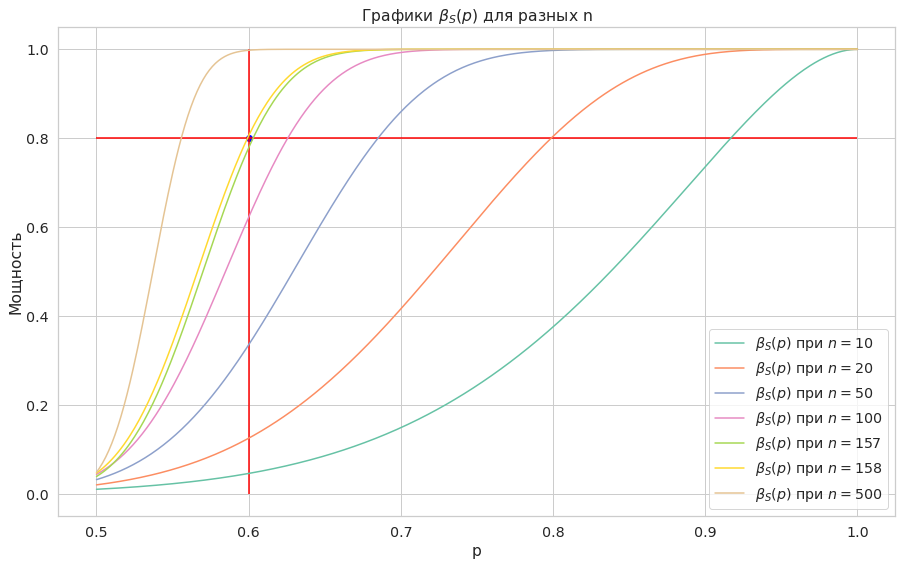

In [260]:
ns = np.array([10, 20, 50, 100, 157, 158, 500])
ps = np.linspace(0.5, 1, 500)
Ns, Ps = np.meshgrid(ns, ps)

c_alpha = sps.binom(n=Ns, p=0.5).ppf(1 - alpha)
power = sps.binom(n=Ns, p=Ps).sf(c_alpha)


plt.figure(figsize=(15, 9))
plt.vlines(0.6, 0, 1, colors='r',)
plt.hlines(0.8, 0.5, 1, colors='r')
plt.scatter(0.6, 0.8, color='b')

for i, n in enumerate(ns):
    plt.plot(ps, power[:, i], label=f'$\\beta_S(p)$ при $n = {n}$')

plt.title('Графики $\\beta_S(p)$ для разных n')
plt.xlabel('p')
plt.ylabel('Мощность')

plt.legend()
plt.show()

Берем $n^* = $

In [264]:
n_star = 158
sps.binom(n=158, p=0.6).sf(sps.binom(n=158, p=0.5).ppf(1 - alpha))

0.8056549358366875

(157 мало)

In [265]:
sps.binom(n=157, p=0.6).sf(sps.binom(n=157, p=0.5).ppf(1 - alpha))

0.7786885461539442

Для выбранного $n^*$ проведите эксперимент, аналогичный проведенным ранее экспериментам, сгенерировав выборки для следующих истинных значений $p$: 
 1. $1/2 < p < p^*$; 
 2. $p > p^*$.

In [151]:
ps = np.array([0.58, 0.67])
samples = sps.binom(n=n_star, p=ps).rvs((10, 2))

p_values = sps.binom(n=n_star, p=0.5).sf(samples)
test = (p_values <= alpha)
print(test.shape)

table_test(samples[:, 0], p_values[:, 0], test[:, 0])

(10, 2)


,T(X),p-value,Отвергается ли?
0,88.0,0.065193,Нет
1,86.0,0.116317,Нет
2,97.0,0.001560,Да
3,95.0,0.004224,Да
4,89.0,0.047237,Да
5,87.0,0.088022,Нет
6,90.0,0.033471,Да
7,100.0,0.000290,Да
8,98.0,0.000913,Да
9,90.0,0.033471,Да


In [152]:
table_test(samples[:, 1], p_values[:, 1], test[:, 1])

,T(X),p-value,Отвергается ли?
0,109.0,4.462132e-07,Да
1,99.0,5.212831e-04,Да
2,101.0,1.572840e-04,Да
3,105.0,1.043492e-05,Да
4,109.0,4.462132e-07,Да
5,104.0,2.140704e-05,Да
6,100.0,2.900635e-04,Да
7,105.0,1.043492e-05,Да
8,103.0,4.274171e-05,Да
9,103.0,4.274171e-05,Да


Получили ожидаемый результат, что при фиксированном n чем больше реальное p, тем лучше отвергается неправильная гипотеза

**Вывод:**
На практике проверили работу p-value. Кроме того, на практике стало понятно, насколько важны: мощность критерия и выбор параметров. Причем то, какие именно параметры нам нужны, зависит от того, какие результаты мы хотим получить

_____
## Задача 2.

Рассмотрим выборку $X = (X_{1}, ..., X_{n}) \sim \mathcal{N}(\theta, 1)$. Проверяются гипотезы $\mathsf{H}_0\colon\ \theta = 0\ \ vs.\ \ \mathsf{H}_1\colon\ \theta\ > 0$.

Выпишите равномерно наиболее мощный критерий, который получен в предыдущем домашнем задании.

$ S = \{\sum\limits_{i=1}^{n}X_i > c_{\alpha}\} $

$ c_{\alpha} = $ `sps.norm.loc(scale = np.sqrt(n)).isf(alpha)`

$ p(t) = $ `sps.norm.loc(scale = np.sqrt(n)).sf(t)` - p-value

На практике перед применением критерия часто проверяют его на корректность следующим образом.
1. Генерируется множество выборок в предположении справедливости $\mathsf{H}_0$. 
2. По каждой из выборок вычисляется p-value.
3. По всем p-value строится гистограмма, которая визуально проверяется на равномерность.

Проверим корректность нашего критерия. Конечно, у нас случай довольно простой, тут и так "все понятно", но стоит отработать навык проверки.

Проведите эксперимент на $10^6$ выборок размера 100 и постройте гистограмму.

In [170]:
sample_size = 100  # размер выборки
sample_count = 10**6  # количество выборок

def plot_for_theta(theta=0.0):
    samples = sps.norm(loc=theta).rvs((sample_count, sample_size))  # множество выборок
    Z_stats = samples.sum(axis=1)  # статистика для каждой из выборок
    pvalues = sps.norm(loc=theta, scale=np.sqrt(sample_size)).sf(Z_stats)  # p-value для каждой из выборок

    plt.figure(figsize=(15, 9))
    plt.hlines(1, 0, 1, colors='b', label='Ожидаемое при $\\theta=0$')  # значение, которое должно быть если theta=
    plt.hist(pvalues, bins=100, density=True, alpha=0.8, color='orange', label='p-value')
    
    plt.legend()
    plt.show()

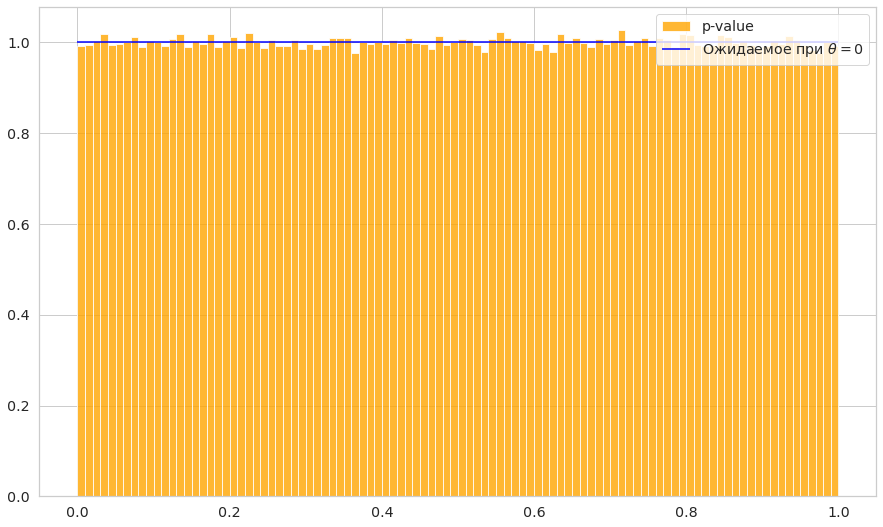

In [171]:
plot_for_theta()

ОЖидается что-то похожее на плотность равномерного распределения по утверждению с лекции:

> Если $H_0$ верна, а распределение T(X) одинаково и непрерывно, то $p(T(X)) \sim \mathsf{U}[0, 1]$


Как известно, критерий не меняется при рассмотрении сложной основной гипотезы $\mathsf{H}_0\colon\ \theta \leqslant 0\ \ vs.\ \ \mathsf{H}_1\colon\ \theta\ > 0$.

Повторите эксперимент для истинного $\theta=-0.1$.

*Замечание.* Подобный эффект все равно не дает оснований говорить об уверенности $\mathsf{H}_0$, поскольку критерий может быть недостаточно мощным.

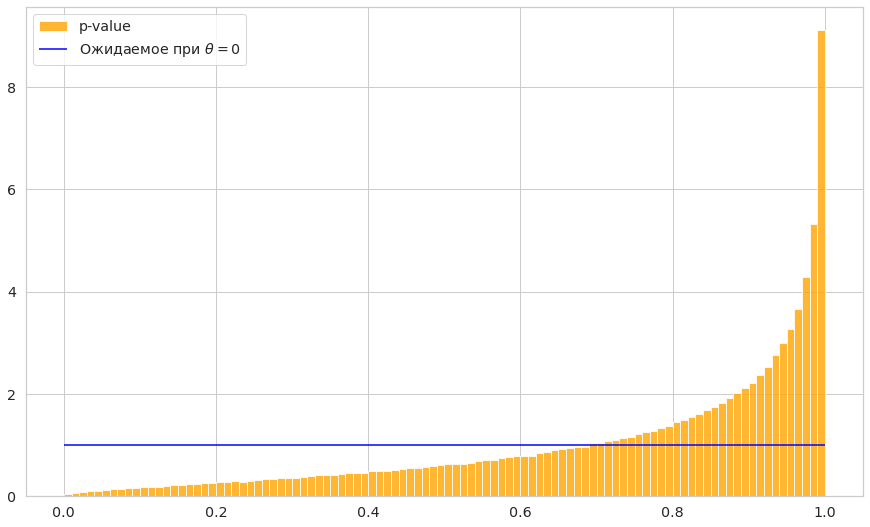

In [166]:
plot_for_theta(theta=-0.1)

Проверьте, как ведет себя p-value для альтернативы, рассмотрев истинную $\theta=0.1$.

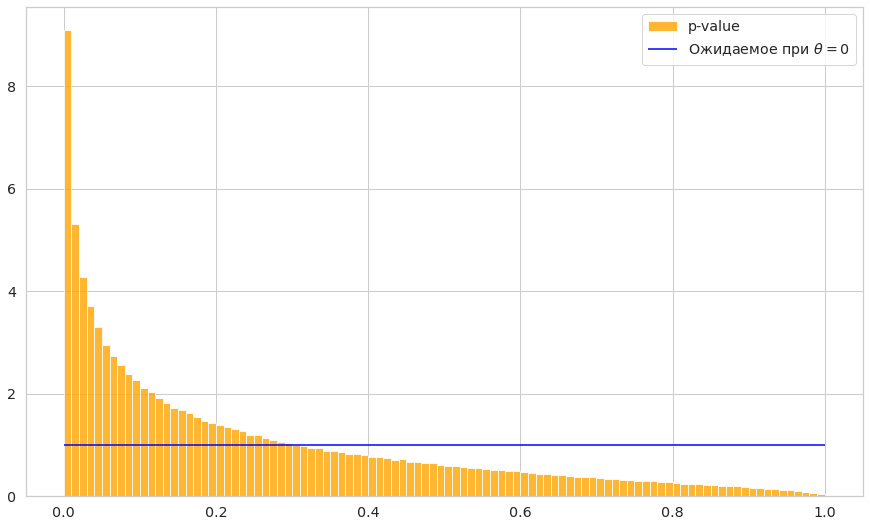

In [167]:
plot_for_theta(theta=0.1)

Чему соответствует доля случаев, в которых p-value меньше 0.05?

По критерию, доказанному в домашке, в этих случаях отвергается $H_0$

**Вывод:** 

Проверили утверждение с лекции о про p_value. Кроме того, стали понятны пункты в утверждениях с лекции про одинаковость распределения T(X) и необходимость H_0 быть верным

_____
## Задача 3.
Были проведены эксперименты для оценки эффективности нескольких препаратов для снижения послеоперационной тошноты. Результаты экспериментов приведены в таблице ниже. При проведении эксперимента пациенты делились на группы случайным образом.




|| Количество пациентов   | Количество случаев возникновения тошноты |
|-----------| ----------- | -------|
|Плацебо|80|45|
|Хлорпромазин|75|26|
|Дименгидринат|85|52|
|Пентобарбитал (100 мг)|67|35|
|Пентобарбитал (150 мг)|85|37|




Проведите сравнение каждого препарата по эффективности по отношению к плацебо. Какие ответы можно получить для методов, контролирующих FWER и FDR? В каждом случае приведите подправленные p-value.

*Замечание.* Используйте [`multipletests`](https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html) из библиотеки `statsmodels`. 

**Решение:** 

Имеем выборки $X_i$, где 0-ая - это плацебо, остальные - соответствующие препараты

`for i in range(1, 5)` 

> $H_i: p_i = p_0 \; vs \;H_i' : p_i < p_0$

Т.е. что препарат не влияет vs снижает вероятность тошноты

Воспользуемся критерием Вальда с лекции (немного измененным под новые условия):

$S = \{W(X_0, X_i) \lt z_{\alpha_i}\}$

$W(X_0, X_i) = \dfrac{\hat p_i - \hat p_0}{\hat \sigma_i} $, где $\hat p_i = \overline{X_i} \overset{d_0}{\sim} \mathcal{N}(p_i, \dfrac{p_i(1-p_i)}{n_i})$, a $\hat \sigma_i = \sqrt{\dfrac{\hat p_i(1-\hat p_i)}{n_i} + \dfrac{\hat p_0(1-\hat p_0)}{n_0}}$ 

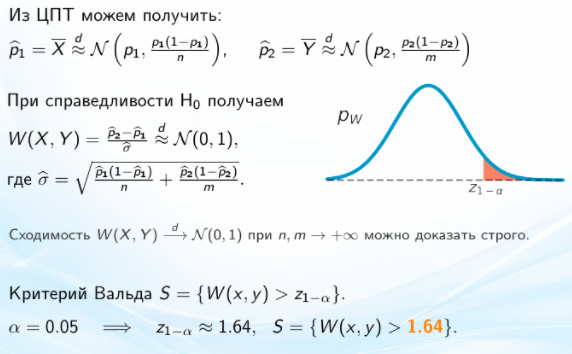

In [211]:
alpha = 0.05
experiments = [
    'Плацебо',
    'Хлорпромазин',
    'Дименгидринат',
    'Пентобарбитал 100 мг',
    'Пентобарбитал 150 мг'
]

ns = np.array([80, 75, 85, 67, 85])
nausea = np.array([45, 26, 52, 35, 37])

p_estim = nausea / ns
p_0_estim = p_estim[0]
n_0 = ns[0]

p_estim = p_estim

sigma_estim = np.sqrt(p_estim * (1 - p_estim) / ns + p_0_estim * (1 - p_0_estim) / n_0)
wald = (p_estim - p_0_estim) / sigma_estim
p_value = sps.norm.cdf(wald)

estim = pd.DataFrame(np.vstack([ns.astype(np.str), nausea.astype(np.str)]).T, index=experiments, columns=['Число испытуемых', 'Число случаев тошноты'])
estim['Вальд'] = wald.astype(np.str)
estim['Вальд'][0] = ''
estim['p-value'] = p_value.astype(np.str)
estim['p-value'][0] = ''

display(estim.style.set_properties(**{
    'text-align': 'left',
    'white-space': 'pre-wrap',
    'border': '1px black solid !important'
}).set_table_styles([{
    'selector': 'th',
    'props': [('border', '1px black solid !important')]
}]))

,Число испытуемых,Число случаев тошноты,Вальд,p-value
Плацебо,80,45,,
Хлорпромазин,75,26,-2.7643637780027186,0.0028516957776288723
Дименгидринат,85,52,0.6429872617820936,0.7398838172885269
Пентобарбитал 100 мг,67,35,-0.48642750289502995,0.3133320473656943
Пентобарбитал 150 мг,85,37,-1.6466051393070562,0.04981961670910121


In [201]:
mc_methods = {'Бонферрони':'bonferroni', 'Холм':'holm', 'Бенджамини-Хохберг':'fdr_bh', 'Бенджамини-Иекутиели':'fdr_by'}
columns = pd.MultiIndex.from_product([mc_methods.keys(), ['Скорректированное p-value', 'Отвергаем?']], names=[ 'Метод', 'Результат'])
results = pd.DataFrame(data=np.zeros(shape=(4, 8)), columns=columns, index=experiments[1:])

for name in mc_methods.keys():
    test = multipletests(estim['p-value'], method='bonferroni', alpha=alpha)
    results[name, 'Скорректированное p-value'] = test[1]
    results[name, 'Отвергаем?'] = ['Да' if check else 'Нет' for check in test[0]]


def highlight_reject(val):
    color = '#ffff00' if val == 'Да' else '#ffffff'
    return f'background-color: {color};'

display(results.style.set_properties(**{
    'text-align': 'left',
    'white-space': 'pre-wrap',
    'border': '1px black solid !important'
}).set_table_styles([{
    'selector': 'th',
    'props': [('border', '1px black solid !important')]
}]).applymap(highlight_reject))

**Вывод:** 

Во всех трех случаях отвергается гипотеза об неэффективности Хлорпромазина, но про остальные препараты ничего не можем сказать

На практике проверили работу метода МПГ

_____
## Задача 4.

В данной задаче вам нужно пронаблюдать эффект, который основные методы коррекции при множественной проверки гипотез оказывают на количественные характеристики критериев — FDR, FWER, мощность. В качестве примера рассматривается проверка односторонних гипотез для компонент вектора средних $\theta$ трёхмерного нормального распределения с известной матрицей ковариаций $\Sigma$. 

**Описание эксперимента**

Дана выборка $X = (X_1, \ldots, X_n)$ из трёхмерного нормального распределения с неизвестным вектором средних ${\theta}$ и известной матрицей ковариаций ${\Sigma}$ и вектор ${\theta_0}$. Для каждой из компонент вектора при помощи равномерно наиболее мощного критерия проверяется пара гипотез: $\mathsf{H}_j\colon\ \theta_j = \theta_j^0\ \ vs.\ \ \mathsf{H}'_j\colon\ \theta_j > \theta_j^0$, где $j\in\{1,2,3\}, \theta = (\theta_1, \theta_2, \theta_3), \theta_0 = (\theta_1^0, \theta_2^0, \theta_3^0)$. Уровень значимости для каждой из гипотез примем равным $\alpha = 0.05$.

Для простоты, в рамках эксперимента из каждой альтернативы будем рассматривать только одно значение $ \theta_j^1 \gg \theta_j^0 $, где ${\theta^{1}}$ — известный вектор. Для вектора средних ${\theta}$ рассматриваются все возможные комбинации: $ \theta_j = \theta_j^0\ \ vs.\ \ \theta_j = \theta_j^1$. В предположениях каждой из них генерируется выборка из $\mathcal{N}({\theta}, {\Sigma})$ и проверяются гипотезы. Эксперимент повторяется достаточное число раз, после чего вычисляются FDR, FWER и мощность критериев (доля правильно отвергнутых гипотез). Формально, вычисляются оценки данных величин.
Вначале эксперименты проводятся без МПГ-коррекции на каждом шаге, затем — с ней. Результаты сравниваются.

Всё вышеописанное повторяется для следующих матриц ковариаций:
1. Диагональная 
    $
    {\Sigma} = \begin{pmatrix} 
                           \alpha & 0 & 0\\ 
                           0 & \beta & 0\\ 
                           0 & 0 & \gamma 
                       \end{pmatrix}
    $;
2. Вырожденная $
    {\Sigma} = \begin{pmatrix} 
                           \alpha & \alpha & \alpha\\ 
                           \alpha & \alpha & \alpha\\ 
                           \alpha & \alpha & \alpha 
                       \end{pmatrix}
    $;
3. Произвольная ${\Sigma}$, не подходящая под условия 1 и 2.

**Реализация**

Вам предоставлен интерфейс для работы с классом `ExperimentHandler` из файла `mht.py`, который должен лежать в той же папке, что и ваш ipynb-файл. Вся работа с `ExperimentHandler` уже встроена в шаблон, *не меняйте ни класс, ни шаблон*. 

От вас требуется реализовать РНМК, вычисление FWER, FDR и мощности, а также три метода МПГ-коррекции — метод Бонферрони, метод Холма и метод Бенджамини-Иекутиели в файле `utils.py`. Классы-заглушки выдаются, вам нужно только заполнить содержательные пропуски в их реализации. Необходимость в реализации методов МПГ-коррекции вызвана тем, что данные методы в statsmodels реализованы не оптимально, и их использование в данной задаче загрузит ваш компьютер на несколько часов. 

Для пущей вычислительной эффективности, каждый метод коррекции принимает на вход *матрицу* p-value размерностей `(число_экспериментов, число_гипотез)` и выдаёт тоже *матрицы*: 
* булевую матрицу `reject`, которая указывает, какие именно гипотезы отвергаются;
* числовую матрицу `adjusted`, содержащую скорректированные p-value.

В данном случае число гипотез равно размерности многомерного нормального распределения, т.е. трём. Коррекция строк производится *независимо*, т.е. метод коррекции нужно применить к каждой строке, а результаты собрать в матрицу. Для вашего удобства, в шаблоне расставлены `assert`-ы, которые проверяют базовую адекватность ваших результатов. В силу нетривиальности векторизации этих методов (кроме Бонферрони), **разрешено использовать цикл по экспериментам**. Цикл по гипотезам тоже можно сделать, поскольку в данной задаче их всего три.

Код РНМК, на вход которому тоже подаётся матрица, должен быть полностью векторизован.

*Если вы ошибётесь в формулах, все ваши последующие усилия будут напрасны, потому будьте внимательны.*

#### 1. Теоретические формулировки

**a**. Напишите определения FWER, FDR, а также мощности процедуры МПГ

$FWER = P(V_{P, S} > 0)$, где $V_{P, S}$ - число отвергнутых верных гипотез, $S$ - критерий, $P$ - распределение, задающее верные гипотезы

$FDR = \mathbb{E}_P \dfrac{V_{P, S}}{max(1, R_S)}$, где $R_S$ -  число отвергнутых гипотез

**b.** Методы МПГ-коррекции. 

Напишите явно, какие величины (FDR, FWER) эти методы контролируют, а также приведите формулы пересчёта p-value и опишите процедуру, по которой определяется, какие из гипотез отвергнуть, а какие нет.  

* *Метод Бонферрони*

Краткое описание:

<...>

* *Метод Холма*

Краткое описание:

<...>

* *Метод Бенджамини-Иекутиели*

Краткое описание:

<...>

**с.** Реализация РНМК 

Выпишите формулу РНМК для проверки гипотез $\mathsf{H}_0\colon\ \theta = \theta_0\ \ vs.\ \ \mathsf{H}_1\colon\ \theta > \theta_0$ для $\mathcal{N}(\theta, \sigma^2)$ с известной дисперсией (одномерный случай).

<...>

#### 2. Реализация.
В файле `utils.py` вам нужно реализовать подсчет FWER, FDR и мощности, а также три метода МПГ-коррекции: метод Бонферрони, метод Холма и метод Бенджамини-Иекутиели.

**Файл `utils.py` необходимо прислать вместе с ноутбуком.**

In [223]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [225]:
%ls
%cd 'gdrive/MyDrive/DS/task9'
%ls

gdrive/  sample_data/
/content/gdrive/MyDrive/DS/task9
mht.py  task9.ipynb  task9.Sasha.ipynb  utils.py  utils.Sasha.py


In [226]:
from mht import ExperimentHandler, AdjustmentMethodABC, AdjustmentMethodTester

In [230]:
%load_ext autoreload
%autoreload 2

from utils import compute_fwer, compute_fdr, compute_power, criterion, \
                  BonferroniAdjustment, HolmAdjustment, BenjaminiYekutieliAdjustment

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


*Замечание*. Обратите внимание на первые строчки в ячейке выше. Расширение [`autoreload`](https://ipython.org/ipython-doc/3/config/extensions/autoreload.html) позволяет перезагружать модуль перед выполнением кода в ячейке, что позволяет вам вносить правки в `utils.py` без необходимости ручной перезагрузки модулей.

#### 3. Подготовка к экспериментам.

Установим значения величин ${\theta_0}, {\theta_1}, {\Sigma}$, а также уровня значимости, числа запусков эксперимента и размера выборки в каждом из них.  
Эти параметры остаются неизменными от итерации к итерации. Для отладки выставляйте `n_runs = 100` или меньше.

In [232]:
theta_list = [
    np.array([1, 2, 3]),
    np.array([-200, 0, 55])
]
sample_size = 4  # размер выборки на каждой итерации

n_runs = 100
# n_runs = int(1e6)  # число экспериментов для каждой из 8 конфигураций
alpha = 0.05  # уровень значимости
random_seed = 42  # random_state (для воспроизводимости)

# методы коррекции p-значений (не менять)
correction_methods = [
    BonferroniAdjustment(alpha=alpha),
    HolmAdjustment(alpha=alpha),
    BenjaminiYekutieliAdjustment(alpha=alpha)
]
method_names = ["bonferroni", "holm", "fdr_by"]
experiment_results = {}

Убедимся в корректности нашей реализации, сравнив с эталонным решением из библиотеки `statsmodels`, а также проверим базовыми тестами подсчет FWER, FDR, мощности.  

In [253]:
%reload_ext autoreload

In [254]:
tester = AdjustmentMethodTester(correction_methods, method_names, 
                                compute_fwer, compute_fdr, compute_power)

tester.run_tests()

перебор методов: 0it [00:00, ?it/s]

Метод Бонферрони. Проверка корректности.


итерации проверки:   0%|          | 0/100 [00:00<?, ?it/s]

Метод Холма. Проверка корректности.


итерации проверки:   0%|          | 0/100 [00:00<?, ?it/s]

(10, 3)
(10, 3)
(10, 3, 3)


AssertionError: ignored

#### 4. Эксперименты

**a.** Диагональная матрица ${\Sigma}$

In [ ]:
Sigma = <определите матрицу 3 на 3>

experiment = ExperimentHandler(
    theta_list=theta_list, 
    Sigma=Sigma,
    cov_mx_description="1. Диагональная матрица ковариаций",
    alpha=alpha,
    n_runs=n_runs,
    sample_size=sample_size, 
    random_seed=random_seed,
    correction_methods=correction_methods,
    criterion=criterion,
    compute_fwer=compute_fwer,
    compute_fdr=compute_fdr,
    compute_power=compute_power
)
experiment_results["1"] = experiment.run()

**b.** Вырожденная матрица ${\Sigma}$

In [ ]:
Sigma = <определите матрицу 3 на 3>

experiment = ExperimentHandler(
    theta_list=theta_list, 
    Sigma=Sigma,
    cov_mx_description="2. Вырожденная матрица",
    alpha=alpha,
    n_runs=n_runs,
    sample_size=sample_size, 
    random_seed=random_seed,
    correction_methods=correction_methods,
    criterion=criterion,
    compute_fwer=compute_fwer,
    compute_fdr=compute_fdr,
    compute_power=compute_power
)
experiment_results["2"] = experiment.run()

**с.** Произвольная матрица ковариаций ${\Sigma}$

In [ ]:
Sigma = <определите матрицу 3 на 3>

assert (np.all(Sigma == Sigma.T) 
        and np.all(np.linalg.eigvals(Sigma) >= 0)),\
    "Это не матрица ковариаций."

experiment = ExperimentHandler(
    theta_list=theta_list, 
    Sigma=Sigma,
    cov_mx_description="3. Произвольная матрица ковариаций",
    alpha=alpha,
    n_runs=n_runs,
    sample_size=sample_size, 
    random_seed=random_seed,
    correction_methods=correction_methods,
    criterion=criterion,
    compute_fwer=compute_fwer,
    compute_fdr=compute_fdr,
    compute_power=compute_power
)
experiment_results["3"] = experiment.run()

#### 5. Вывод.

Опишите, какие свойства методов МПГ-коррекции вы пронаблюдали. Обоснуйте, почему методы МПГ-коррекции обязательно нужно применять. Поясните, что будет, если этого не делать.

<...>